## Project 2: CNN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K

import tensorflow as tf

import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.1.1
1.3.0


### Step 1: Prepare & label dataset

In [3]:
num_examples_per_class = 10000
num_classes = 100

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
           'foot','fork']

x_data = np.load('./x_data_100_classes_10k.npy')
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]
y_data = np.concatenate(labels,axis=0)

### Step 2: Let's take a look at one example

In [4]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray')
    plt.show()

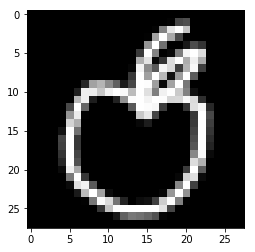

The label of this data is: 6


In [5]:
show_object(x_data[66666])
print('The label of this data is: %d' % y_data[66666])

### Step 3: Shuffle & preprocessing dataset

In [6]:
# Shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [7]:
x_data,y_data = unison_shuffled_copies(x_data,y_data)

In [8]:
imcols = 28
imrows = 28
image_shape = (imrows, imcols, 1)

# Preprocessing dataset
x_train, x_rest, y_train, y_rest = train_test_split(x_data,y_data,test_size=0.4)
x_validation, x_test, y_validation, y_test = train_test_split(x_rest,y_rest,test_size=0.25)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0 # Normalize training data
x_validation = x_validation/255.0 # Normalize validation data
x_test = x_test/255.0 # Normalize testing data

x_train = x_train.reshape(x_train.shape[0], imrows, imcols, 1)
x_validation = x_validation.reshape(x_validation.shape[0], imrows, imcols, 1)
x_test = x_test.reshape(x_test.shape[0], imrows, imcols, 1)
y_train = keras.utils.to_categorical(y_train,num_classes)
y_validation = keras.utils.to_categorical(y_validation,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(600000, 28, 28, 1)
(300000, 28, 28, 1)
(100000, 28, 28, 1)


### Step 4: Setup the model

In [9]:
model = Sequential()

model.add(Conv2D(20,(5,5),input_shape=(image_shape),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Dense(num_classes,activation='softmax'))

# Define loss function & optimizer
adam = keras.optimizers.Adam(lr=0.005,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
__________

### Step 5: Train the model

In [10]:
batch_sizes = 10000
epochs = 200

history = model.fit(x_train,y_train,batch_size=batch_sizes,epochs=epochs,verbose=1,validation_data=(x_validation, y_validation))

Train on 600000 samples, validate on 300000 samples
Epoch 1/200
600000/600000 [==============================] - 18s 29us/step - loss: 2.8984 - acc: 0.3217 - val_loss: 3.9625 - val_acc: 0.0717
Epoch 2/200
600000/600000 [==============================] - 14s 24us/step - loss: 2.0852 - acc: 0.4934 - val_loss: 3.3838 - val_acc: 0.2804
Epoch 3/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.9201 - acc: 0.5336 - val_loss: 2.8891 - val_acc: 0.4737
Epoch 4/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.8310 - acc: 0.5545 - val_loss: 2.3797 - val_acc: 0.5970
Epoch 5/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.7712 - acc: 0.5698 - val_loss: 1.9646 - val_acc: 0.6473
Epoch 6/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.7307 - acc: 0.5798 - val_loss: 1.6535 - val_acc: 0.6749
Epoch 7/200
600000/600000 [==============================] - 14s 24us/step - loss: 1.6995 - acc: 0.588

600000/600000 [==============================] - 14s 23us/step - loss: 1.4600 - acc: 0.6468 - val_loss: 1.0738 - val_acc: 0.7329
Epoch 59/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4584 - acc: 0.6475 - val_loss: 1.0741 - val_acc: 0.7332
Epoch 60/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4576 - acc: 0.6485 - val_loss: 1.0731 - val_acc: 0.7332
Epoch 61/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4574 - acc: 0.6478 - val_loss: 1.0717 - val_acc: 0.7332
Epoch 62/200
600000/600000 [==============================] - 14s 24us/step - loss: 1.4541 - acc: 0.6492 - val_loss: 1.0721 - val_acc: 0.7330
Epoch 63/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4526 - acc: 0.6487 - val_loss: 1.0718 - val_acc: 0.7336
Epoch 64/200
600000/600000 [==============================] - 14s 24us/step - loss: 1.4519 - acc: 0.6486 - val_loss: 1.0699 - val_acc: 0.7338
Epoch 65/200
600000

600000/600000 [==============================] - 14s 23us/step - loss: 1.4206 - acc: 0.6566 - val_loss: 1.0517 - val_acc: 0.7377
Epoch 116/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4223 - acc: 0.6558 - val_loss: 1.0511 - val_acc: 0.7380
Epoch 117/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4195 - acc: 0.6569 - val_loss: 1.0510 - val_acc: 0.7381
Epoch 118/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4213 - acc: 0.6558 - val_loss: 1.0510 - val_acc: 0.7381
Epoch 119/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4191 - acc: 0.6562 - val_loss: 1.0506 - val_acc: 0.7380
Epoch 120/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4213 - acc: 0.6560 - val_loss: 1.0507 - val_acc: 0.7377
Epoch 121/200
600000/600000 [==============================] - 14s 24us/step - loss: 1.4199 - acc: 0.6560 - val_loss: 1.0499 - val_acc: 0.7382
Epoch 122/200

600000/600000 [==============================] - 14s 23us/step - loss: 1.4032 - acc: 0.6603 - val_loss: 1.0405 - val_acc: 0.7403
Epoch 173/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4023 - acc: 0.6602 - val_loss: 1.0404 - val_acc: 0.7405
Epoch 174/200
600000/600000 [==============================] - 14s 24us/step - loss: 1.4029 - acc: 0.6612 - val_loss: 1.0406 - val_acc: 0.7404
Epoch 175/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.3993 - acc: 0.6614 - val_loss: 1.0405 - val_acc: 0.7406
Epoch 176/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4010 - acc: 0.6606 - val_loss: 1.0397 - val_acc: 0.7405
Epoch 177/200
600000/600000 [==============================] - 14s 24us/step - loss: 1.4001 - acc: 0.6618 - val_loss: 1.0401 - val_acc: 0.7406
Epoch 178/200
600000/600000 [==============================] - 14s 23us/step - loss: 1.4022 - acc: 0.6618 - val_loss: 1.0400 - val_acc: 0.7404
Epoch 179/200

### Step 6: Visualize train process

In [11]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

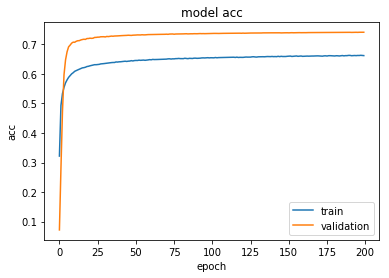

In [12]:
plot_train(history)

### Step 7: Evaluate & save the model

In [14]:
score = model.evaluate(x_validation,y_validation,verbose=1)

print("Validation Accuracy = ", score[1])
print("Validation Loss = ", score[0])

model.save('model.h5')

300000/300000 [==============================] - 19s 62us/step
Validation Accuracy =  0.741186666667
Validation Loss =  1.03703028741


### Step 8: Let's make some predictions

In [23]:
result = model.predict(x_test)
count = 0
correct = 0

for r in result:
    idx = np.argmax(r)
    gt = np.argmax(y_test[count])
    if idx == gt:
        correct = correct + 1
    count = count + 1

print('Test Accuracy:', correct/count*100,'%')

Test Accuracy: 74.128 %


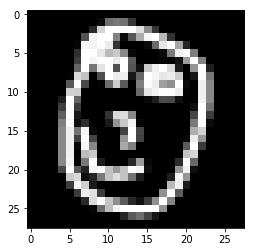

The label index of this data is: 83 -- face


In [27]:
show_object(x_test[666])
print('The label index of this data is: %d' % np.argmax(y_test[666]),'--',classes[np.argmax(y_test[666])])